# Importing Libraries

In [205]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [207]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 97 files belonging to 51 classes.
['Black grass49', 'Black grass50', 'Black grass51', 'Black grass52', 'Charlock33', 'Charlock34', 'Charlock35', 'Charlock36', 'Cleavers25', 'Cleavers26', 'Cleavers27', 'Cleavers28', 'Cranes_bill41', 'Cranes_bill42', 'Cranes_bill43', 'Cranes_bill44', 'Fat Hen37', 'Fat Hen38', 'Fat Hen39', 'Fat Hen40', 'Fersken pileurt_dead_29', 'Field Pansy 45', 'Field Pansy 47', 'Loose Silky_bent53', 'Loose Silky_bent54', 'Loose Silky_bent55', 'Loose Silky_bent56', 'Majs1', 'Majs2', 'Majs3', 'Majs4', 'Sugar beet10', 'Sugar beet11', 'Sugar beet12', 'Sugar beet9', 'Wheat5', 'Wheat6', 'Wheat7', 'Wheat8', 'chickweed17', 'chickweed18', 'chickweed19', 'chickweed20', 'scentless mayweed13', 'scentless mayweed14', 'scentless mayweed15', 'scentless mayweed16', "shepherd's_purse 21", "shepherd's_purse 22", "shepherd's_purse 23", "shepherd's_purse 24"]


# Loading Model

In [193]:
cnn = tf.keras.models.load_model('trained_plant_Identification_model.keras')

#Visualising and Performing Prediction on Single image

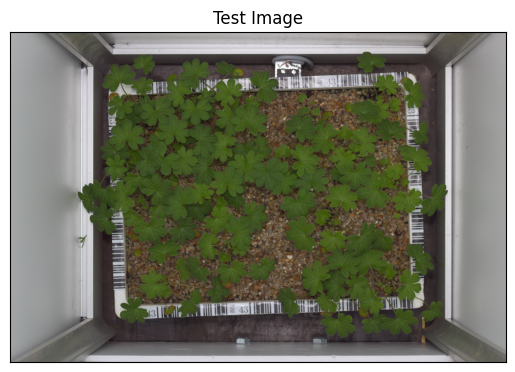

In [219]:
#Test Image Visualization
import cv2
image_path = 'test/IMG_0930_12-17.PNG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [221]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [223]:
print(predictions)

[[9.9751298e-07 8.7884882e-06 1.6346703e-05 4.2005513e-06 3.9077613e-06
  1.6318294e-05 9.6169879e-07 6.5330033e-07 2.3747098e-05 8.4546528e-08
  3.6941385e-06 5.4453529e-05 1.6198387e-04 4.2935531e-03 9.9289483e-01
  8.1270591e-05 9.3734616e-06 4.9355644e-06 2.8405568e-05 3.1577052e-05
  3.9961461e-09 4.8743276e-10 3.7755785e-11 8.3608751e-07 9.1653203e-07
  2.6072669e-06 4.0565416e-07 1.8191540e-04 1.1973159e-04 1.5716044e-04
  2.8492807e-04 1.1233581e-04 1.6412868e-04 9.3537499e-05 8.0034653e-05
  2.5665227e-07 1.8310444e-05 1.5391524e-05 2.1330338e-06 1.4656530e-05
  1.0174070e-05 1.5199070e-05 1.3917115e-07 9.7647317e-06 2.6821119e-06
  3.7521644e-05 9.3023275e-04 3.9340273e-05 6.7772426e-06 1.8072215e-05
  4.0797160e-05]]


In [225]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

14


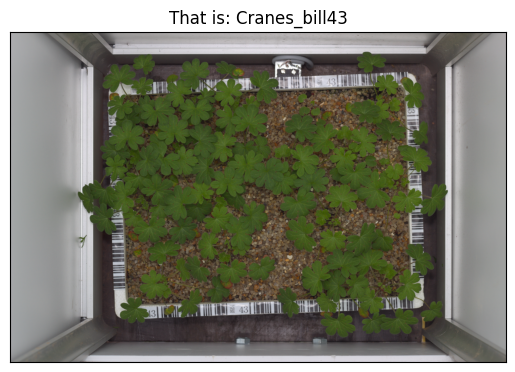

In [227]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"That is: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()